# Load the data for the unfolding $\tau \rightarrow \pi \pi_0 \nu$

Load the data as prepared by `prep_tau_pipi0nu.ipynb`

In [1]:
from utils import load_response_and_histograms
from unfolders.utils import root as root_utils
from utils.stats import compute_numpy_covariance_matrix
import numpy as np

# Histogram's metadata
nbins, rmin, rmax = 50, 0.2, 1.8
variable_title = "invariant mass"

# Get the histograms of the training set
truth_histograms = load_response_and_histograms("./data/response_training_tau_pipi0_BGx1.root")
xini, xini_edges = truth_histograms[0]
bini, _ = truth_histograms[1]
R, _ = truth_histograms[2]
R_probabilities = np.true_divide(R, xini, where=xini != 0)

# Get the histograms of the test set
test_histograms = load_response_and_histograms("./data/response_test_tau_pipi0_BGx1.root")
datatrue, _ = test_histograms[0]
data, _ = test_histograms[1]

# Compute the covariance matrix of the test data
statcov = compute_numpy_covariance_matrix(data)

Welcome to JupyROOT 6.23/01


## Annealing unfolding

In [2]:
# Set up logger to print in the notebook
import sys, logging
logging.getLogger("matplotlib").setLevel(logging.WARNING)
logging.basicConfig(
    stream=sys.stdout,
    format="[%(name)s] %(levelname)s: %(message)s",
    level=logging.INFO,
)
# Unfolding libraries
from unfolders.unfolder import Unfolder
from unfolders.annealing import (
    SimulatedAnnealingBackend,
    SimulatedQuantumAnnealingBackend,
)

# Select the backend
backend = SimulatedAnnealingBackend(4, 100, weight_regularization=0.7)
# Perform unfolding
unfolder = Unfolder(data, statcov, xini, bini, R_probabilities)
result = unfolder.unfold(backend)

num reads: 100


Plot the results

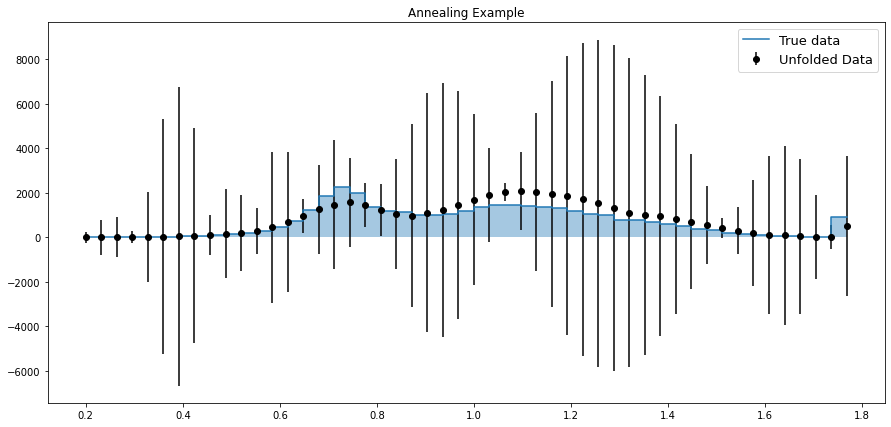

In [3]:
import pylab as plt

# Plot the result
axis = xini_edges[0][:-1]
plt.figure(figsize=(15, 7))
# Plot the original distribution
plt.step(axis, datatrue, fillstyle="bottom", label="True data")
plt.fill_between(axis, datatrue, step="pre", alpha=0.4)
# Plot the unfolded
plt.errorbar(
    axis,
    result.solution,
    yerr=result.error,
    fmt="o",
    color="black",
    label="Unfolded Data",
)
plt.legend(prop={"size": 13})
plt.title("Annealing Example")
plt.show()

## Unfolding with SVD

In [7]:
from unfolders.unfolder import Unfolder
from unfolders.svd import SVDBackend

# Select the backend
backend = SVDBackend(8, rmin, rmax)
# Perform unfolding
unfolder = Unfolder(data, statcov, xini, bini, R_probabilities)
result = unfolder.unfold(backend)

Info in <TSVDUnfold::Unfold>: Unfolding param: 8
Info in <TSVDUnfold::Unfold>: Curvature of weight distribution: 0.073123


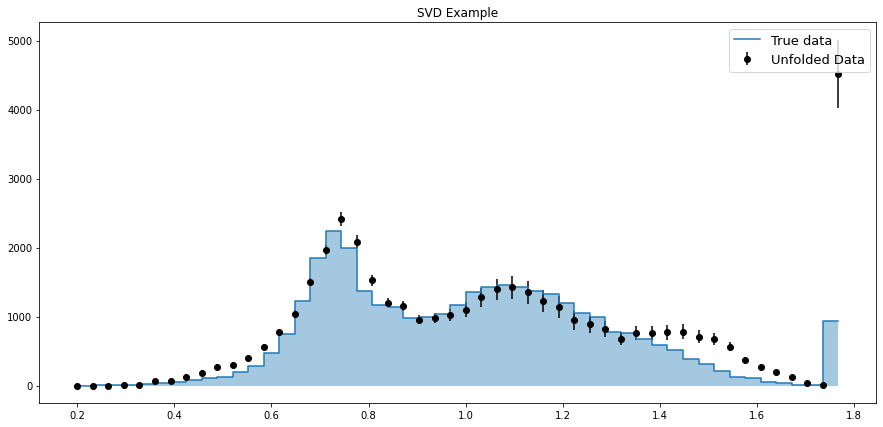

In [8]:
import pylab as plt

# Plot the result
axis = xini_edges[0][:-1]
plt.figure(figsize=(15, 7))
# Plot the original distribution
plt.step(axis, datatrue, fillstyle="bottom", label="True data")
plt.fill_between(axis, datatrue, step="pre", alpha=0.4)
# Plot the unfolded
plt.errorbar(
    axis,
    result.solution,
    yerr=result.error,
    fmt="o",
    color="black",
    label="Unfolded Data",
)
plt.legend(prop={"size": 13})
plt.title("SVD Example")
plt.show()

(0.001, 10.0)

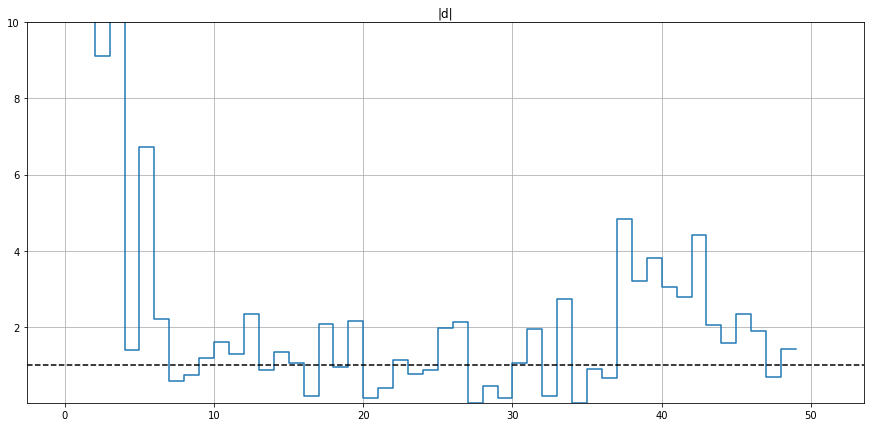

In [9]:
kreg_distribution = backend.kreg_distribution
plt.figure(figsize=(15, 7))
plt.step(range(0,nbins), kreg_distribution)
plt.axline((0,1), (nbins+1,1), color="black", linestyle="--")
plt.title("|d|")
plt.grid()
plt.ylim(0.001, 10)